In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape

(5497, 14)

In [4]:
test.shape

(1000, 13)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 1000 non-null   int64  
 1   fixed acidity         1000 non-null   float64
 2   volatile acidity      1000 non-null   float64
 3   citric acid           1000 non-null   float64
 4   residual sugar        1000 non-null   float64
 5   chlorides             1000 non-null   float64
 6   free sulfur dioxide   1000 non-null   float64
 7   total sulfur dioxide  1000 non-null   float64
 8   density               1000 non-null   float64
 9   pH                    1000 non-null   float64
 10  sulphates             1000 non-null   float64
 11  alcohol               1000 non-null   float64
 12  type                  1000 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 101.7+ KB


In [7]:
train.quality.value_counts()

6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: quality, dtype: int64

In [8]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [28]:
import seaborn as sns

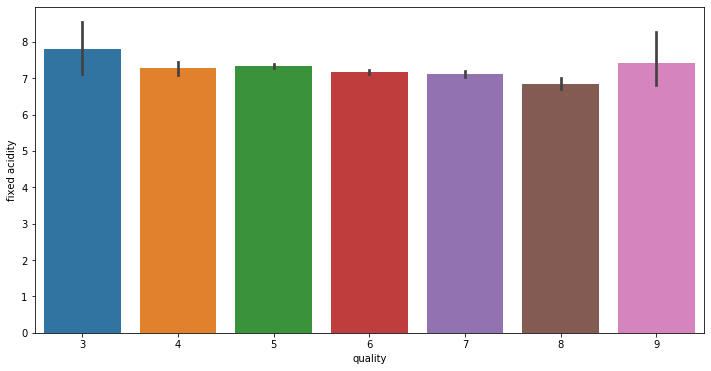

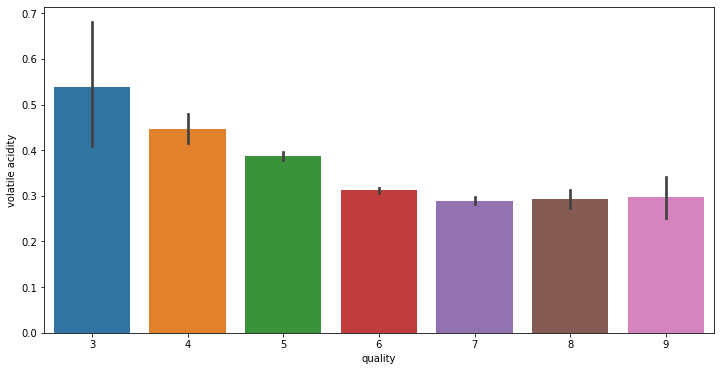

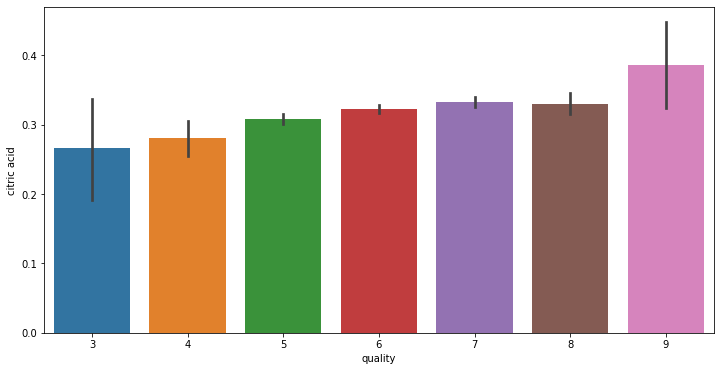

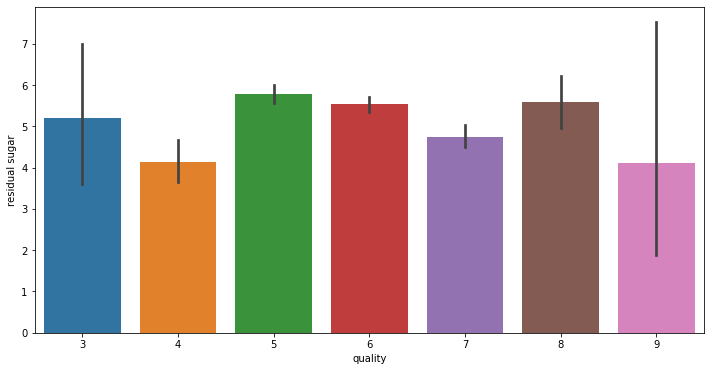

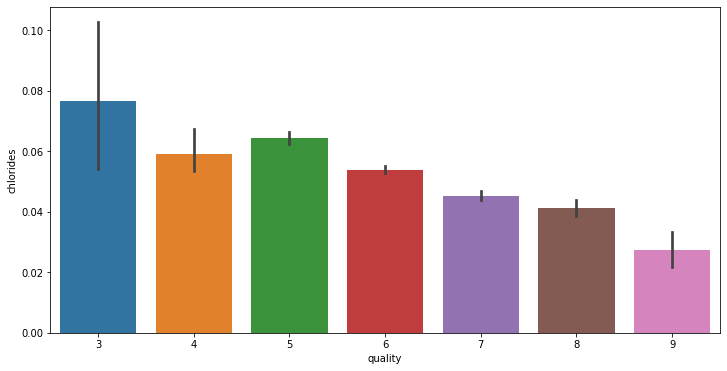

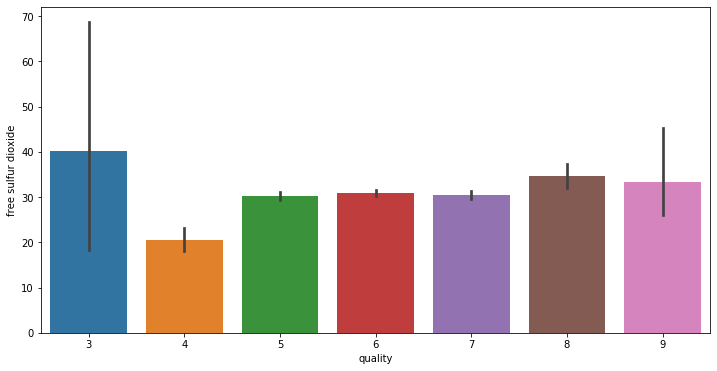

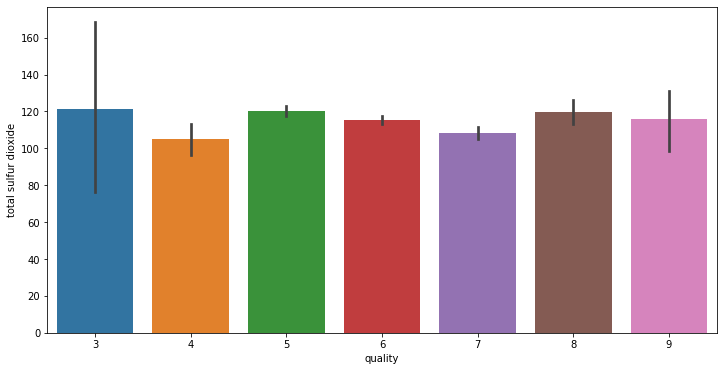

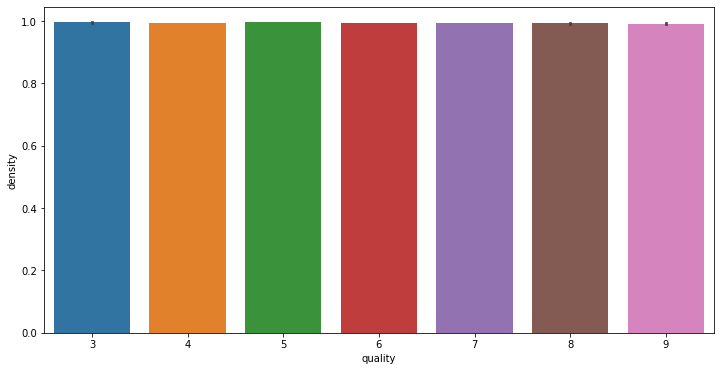

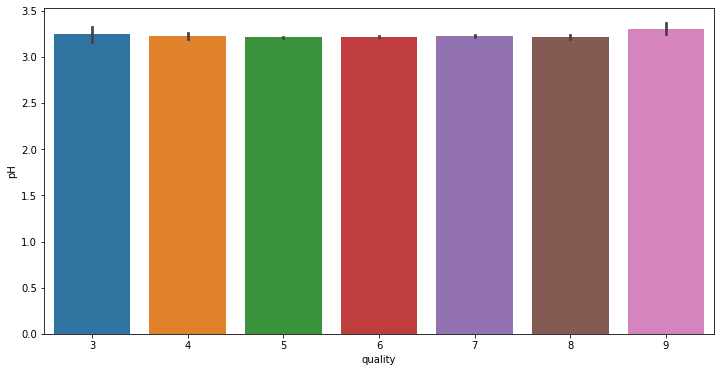

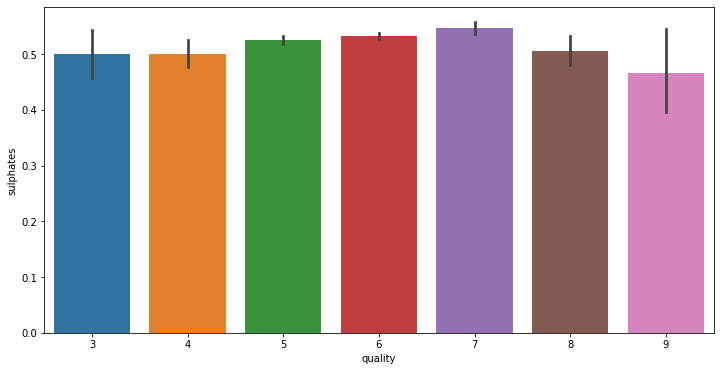

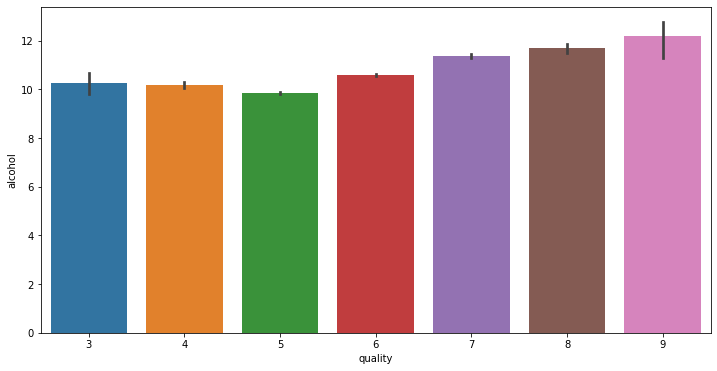

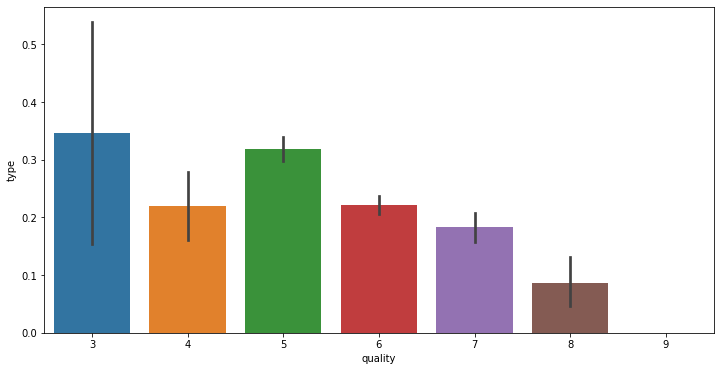

In [32]:
for i in range(12):
    fig = plt.figure(figsize=(12,6))
    sns.barplot(x='quality',y=train.columns[i+2],data=train)

In [9]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from xgboost import plot_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [10]:
type_mapping = {'white':0,'red':1}
train_test_data = [train,test]
for data in train_test_data:
    data['type']=data['type'].map(type_mapping)

In [11]:
cols = list(train.columns)
col_x= cols[2:]
col_y = cols[1]

In [12]:
model = XGBClassifier()
model.fit(train[col_x],train[col_y])
y_pred = model.predict(test[col_x])

[18:54:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


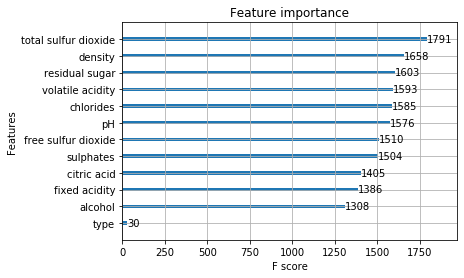

In [13]:
fscore = model.get_booster().get_fscore()
plot_importance(fscore)

In [14]:
fscore

{'free sulfur dioxide': 1510,
 'volatile acidity': 1593,
 'alcohol': 1308,
 'total sulfur dioxide': 1791,
 'chlorides': 1585,
 'citric acid': 1405,
 'residual sugar': 1603,
 'type': 30,
 'density': 1658,
 'sulphates': 1504,
 'pH': 1576,
 'fixed acidity': 1386}

In [15]:
name = sorted(fscore,key=fscore.get,reverse=True)
score = [fscore[key] for key in name]

In [16]:
fscore_df = pd.DataFrame({'name':name,'score':score})
fscore_df

,name,score
0,total sulfur dioxide,1791
1,density,1658
2,residual sugar,1603
3,volatile acidity,1593
4,chlorides,1585
5,pH,1576
6,free sulfur dioxide,1510
7,sulphates,1504
8,citric acid,1405
9,fixed acidity,1386


In [17]:
new_fscore_df = fscore_df.loc[:7,:]
new_fscore_df

,name,score
0,total sulfur dioxide,1791
1,density,1658
2,residual sugar,1603
3,volatile acidity,1593
4,chlorides,1585
5,pH,1576
6,free sulfur dioxide,1510
7,sulphates,1504


In [18]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10,shuffle = True, random_state=0)

In [19]:
model = KNeighborsClassifier(n_neighbors = 3)
scoring = 'accuracy'
score = cross_val_score(model,train[col_x],train[col_y],cv = kfold,n_jobs=1,scoring=scoring)
score

array([0.45454545, 0.50909091, 0.49272727, 0.49818182, 0.48      ,
       0.46909091, 0.45818182, 0.46812386, 0.46812386, 0.49180328])

In [20]:
import numpy as np
round(np.mean(score),2)

0.48

In [21]:
model = DecisionTreeClassifier()
score = cross_val_score(model,train[col_x],train[col_y],cv = kfold,n_jobs=1,scoring=scoring)
score
round(np.mean(score),2)

0.61

In [22]:
model = GaussianNB()
score = cross_val_score(model,train[col_x],train[col_y],cv = kfold,n_jobs=1,scoring=scoring)
score
round(np.mean(score),2)

0.4

In [23]:
model = SVC()
score = cross_val_score(model,train[col_x],train[col_y],cv = kfold,n_jobs=1,scoring=scoring)
score
round(np.mean(score),2)

0.44

In [24]:
model = RandomForestClassifier()
score = cross_val_score(model,train[col_x],train[col_y],cv = kfold,n_jobs=1,scoring=scoring)
score
round(np.mean(score),2)
model.fit(train[col_x],train[col_y])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
round(np.mean(score),2)

0.69

In [26]:
y_pred = model.predict(test[col_x])
test_data = test['index'].copy()
df = pd.DataFrame({'index':test_data,'quality':y_pred})
df.to_csv('submission2.csv',index=False)